In [112]:
import pandas as pd
import mplfinance as mplf
import heapq

In [113]:
# Coinbase - BTC weekly data

df = pd.read_csv('data/btc-1w-20220717.csv')
df.head()

,time,open,high,low,close
0,2016-10-16T20:00:00-04:00,642.10,658.00,625.60,651.04
1,2016-10-23T20:00:00-04:00,651.05,725.64,645.81,697.41
2,2016-10-30T20:00:00-04:00,697.39,746.16,672.06,717.02
3,2016-11-06T19:00:00-05:00,717.04,747.26,685.70,704.01
4,2016-11-13T19:00:00-05:00,704.01,753.81,673.85,731.99


In [114]:
df.time = pd.to_datetime(df['time'], utc=True)
df = df.set_index(df['time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 300 entries, 2016-10-17 00:00:00+00:00 to 2022-07-11 00:00:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   time    300 non-null    datetime64[ns, UTC]
 1   open    300 non-null    float64            
 2   high    300 non-null    float64            
 3   low     300 non-null    float64            
 4   close   300 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(4)
memory usage: 14.1 KB


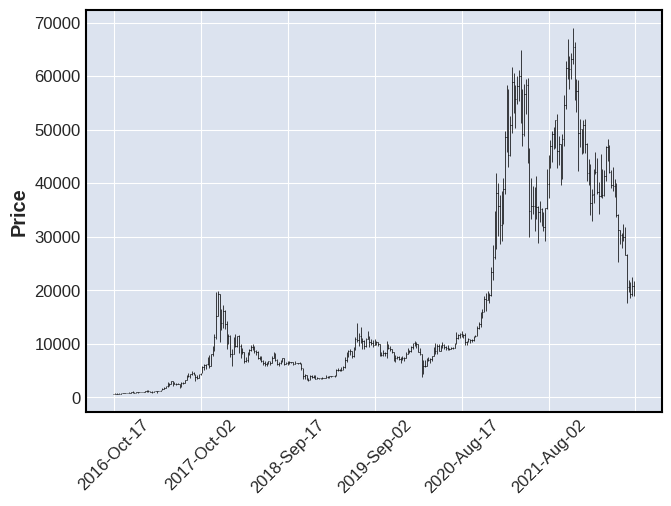

In [115]:
mplf.plot(df)

In [204]:
def get_weekly_levels(weekly_prices):
    # min heap
    closes_above = []
    heapq.heapify(closes_above)
    
    # max heap
    closes_below = []
    heapq.heapify(closes_below)
    
    for index, row in weekly_prices.iterrows():
        # price = weeks[i]
        # if price is greater than smallest close above, then remove stuff
        
        while len(closes_above) > 0 and row['close'] > heapq.nsmallest(1, closes_above)[0]:
            heapq.heappop(closes_above)
        
        # if price lower than highest close below, remove stuff
        
        while len(closes_below) > 0 and row['close'] < abs(heapq.nsmallest(1, closes_below)[0]):
            heapq.heappop(closes_below)
            
        heapq.heappush(closes_above, row['close'])        
        heapq.heappush(closes_below, (row['close'])*-1)
        
    levels = []
    for c in closes_below:
        levels.append(abs(c))
    for c in closes_above:
        levels.append(c)
    
    return levels


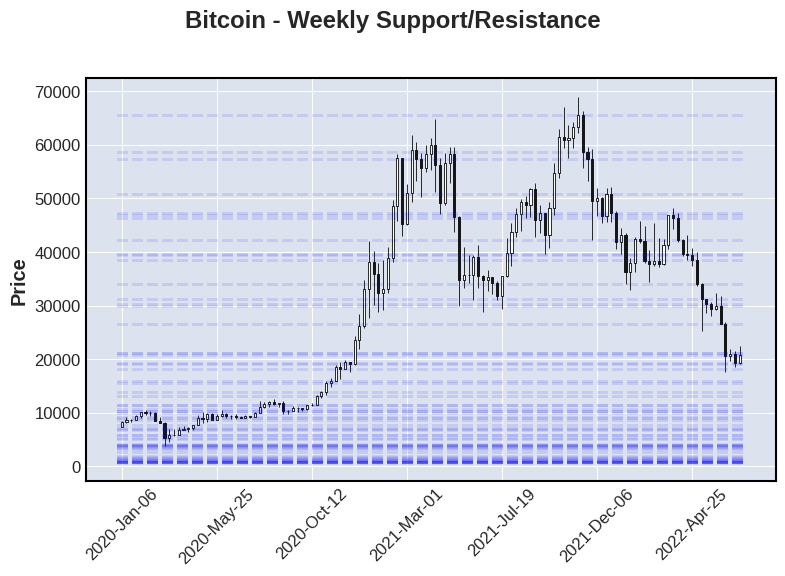

In [205]:
levels = get_weekly_levels(df)

mplf.plot(df.loc['2020-01-01':'2022-07-04'],
          figratio=(20,12),
          title='Bitcoin - Weekly Support/Resistance',
          type='candle',
          hlines=dict(hlines=levels,colors=['b'],alpha=0.1, linestyle='--')
         )